# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0 )


The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

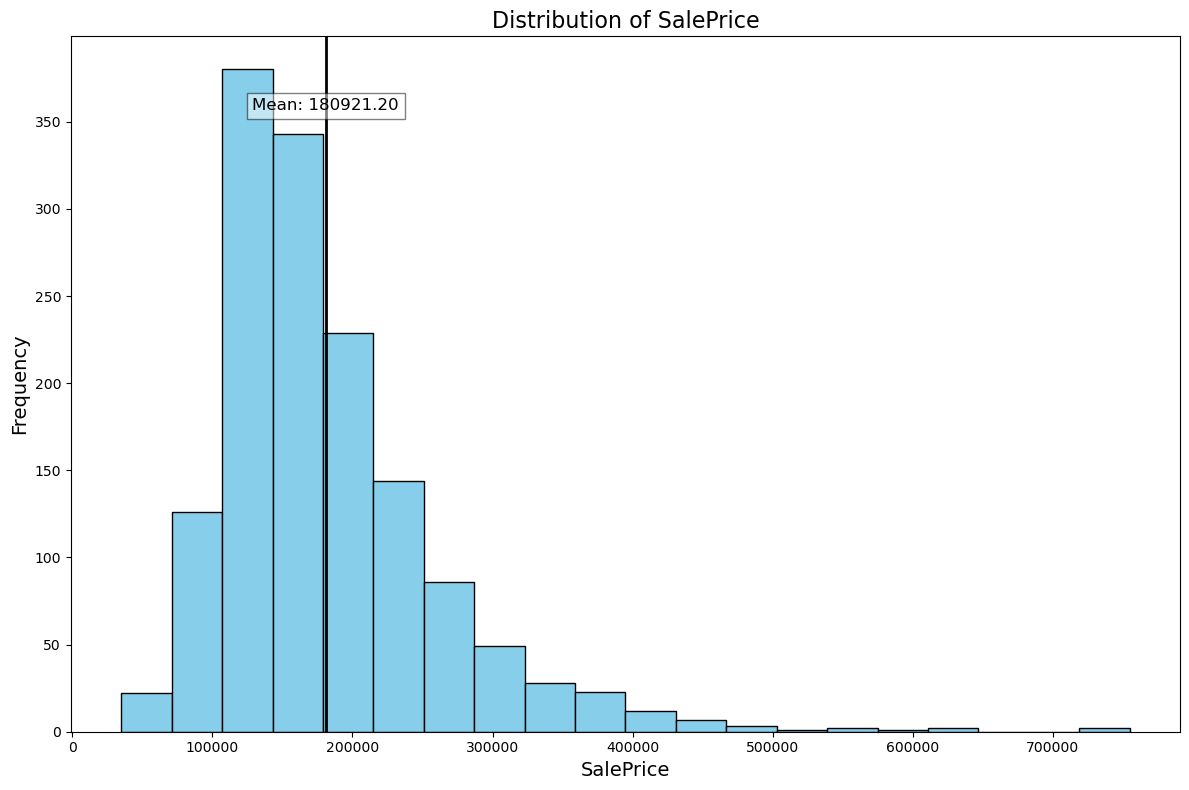

In [6]:
# Your code here 
# plot histogram
fig, ax = plt.subplots(figsize =(12,8))
ax.hist(df['SalePrice'], bins = 20, color='skyblue', edgecolor= 'black')
ax.set_xlabel('SalePrice', fontsize=14);
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of SalePrice', fontsize=16)

# mean calculation
mean_value = df['SalePrice'].mean()
# Add text to show the mean value
ax.text(mean_value, ax.get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', 
        color='black', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a black vertical line to indicate the mean
ax.axvline(mean_value, color='black', linewidth=2)

#adjust the layout
plt.tight_layout()
plt.show();

Now, print out the mean, median, and standard deviation:

In [7]:
# Your code here
mean_value = df['SalePrice'].mean()
median_value = df['SalePrice'].median()
std_value = df['SalePrice'].std()
print(f"Mean SalePrice: {mean_value:.2f}")
print(f"Median SalePrice: {median_value:.2f}")
print(f"Standard Deviation of SalePrice: {std_value:.2f}")

Mean SalePrice: 180921.20
Median SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


In the cell below, interpret the above information.

In [8]:
# Replace None with appropriate text
"""
#Histogram
The distribution of house prices seems to be right-skewed. This is indicated by the fact that the mean is higher than the median, which suggests that a few high-priced houses are dragging the mean upwards.

#Vertical line
The vertical black line at the mean in the histogram helps visualize where the average house price falls in the distribution.

#Mean
The mean sale price of houses in the dataset is $180,921.20. It represents the average value of the SalePrice column.

#Median
The median sale price is $163,000.00, which is the middle value of the sorted sale prices. Half of the houses are priced below this value, and half are priced above it.

#Standard deviation
The standard deviation of the sale prices is $79442.50. it shows how spread out the sale prices are from the mean. Since it large, it indicates that there is considerable variation in house prices. Some houses are much more expensive or cheaper than the average.

"""

'\n#Histogram\nThe distribution of house prices seems to be right-skewed. This is indicated by the fact that the mean is higher than the median, which suggests that a few high-priced houses are dragging the mean upwards.\n\n#Vertical line\nThe vertical black line at the mean in the histogram helps visualize where the average house price falls in the distribution.\n\n#Mean\nThe mean sale price of houses in the dataset is $180,921.20. It represents the average value of the SalePrice column.\n\n#Median\nThe median sale price is $163,000.00, which is the middle value of the sorted sale prices. Half of the houses are priced below this value, and half are priced above it.\n\n#Standard deviation\nThe standard deviation of the sale prices is $79442.50. it shows how spread out the sale prices are from the mean. Since it large, it indicates that there is considerable variation in house prices. Some houses are much more expensive or cheaper than the average.\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

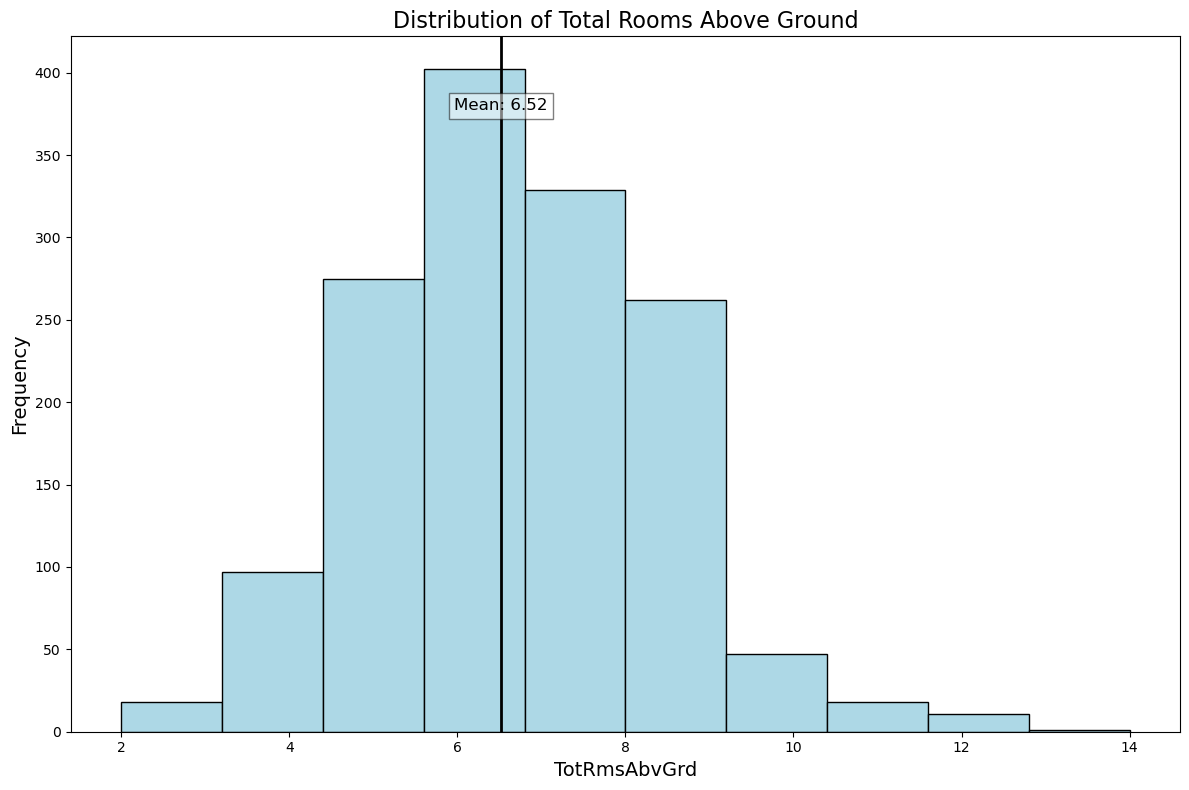

In [9]:
# Your code here
# plot histogram
fig, ax = plt.subplots(figsize =(12,8))
ax.hist(df['TotRmsAbvGrd'], bins = 10, color='lightblue', edgecolor= 'black')
ax.set_xlabel('TotRmsAbvGrd', fontsize=14);
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Total Rooms Above Ground', fontsize=16)

# mean calculation
mean_value = df['TotRmsAbvGrd'].mean()
# Add text to show the mean value
ax.text(mean_value, ax.get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', 
        color='black', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a black vertical line to indicate the mean
ax.axvline(mean_value, color='black', linewidth=2)

#adjust the layout
plt.tight_layout()
plt.show();

Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here
mean_value = df['TotRmsAbvGrd'].mean()
median_value = df['TotRmsAbvGrd'].median()
std_value = df['TotRmsAbvGrd'].std()
print(f"Mean TotRmsAbvGrd: {mean_value:.2f}")
print(f"Median TotRmsAbvGrd: {median_value:.2f}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_value:.2f}")

Mean TotRmsAbvGrd: 6.52
Median TotRmsAbvGrd: 6.00
Standard Deviation of TotRmsAbvGrd: 1.63


In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
"""
Most homes in the dataset have around 6 to 7 rooms above ground.
The distribution of room counts is slightly skewed to the right, meaning there are a few houses with more rooms than average.
The standard deviation indicates that while the average number of rooms is fairly consistent, some houses deviate from the mean by up to 1 or 2 rooms.
"""


'\nMost homes in the dataset have around 6 to 7 rooms above ground.\nThe distribution of room counts is slightly skewed to the right, meaning there are a few houses with more rooms than average.\nThe standard deviation indicates that while the average number of rooms is fairly consistent, some houses deviate from the mean by up to 1 or 2 rooms.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

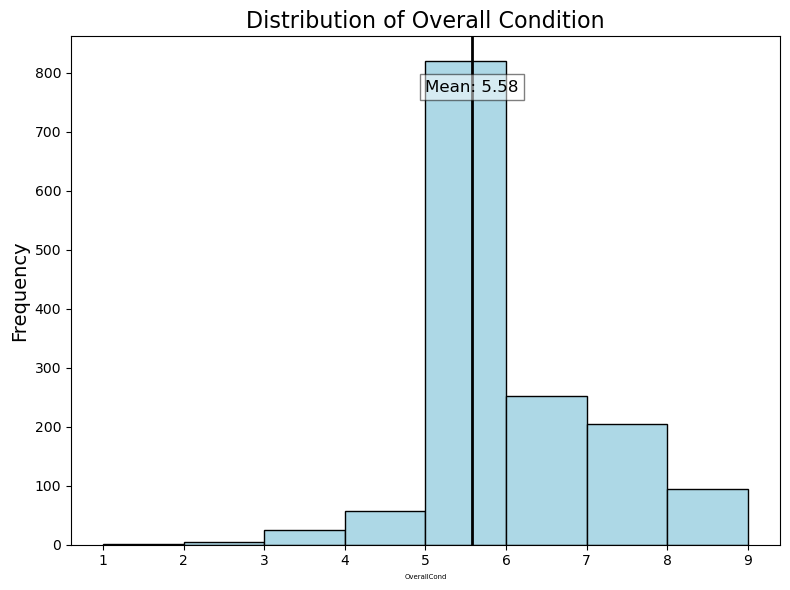

In [12]:
# Your code here
# plot histogram
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df['OverallCond'], bins = 8, color='lightblue', edgecolor= 'black')
ax.set_xlabel('OverallCond', fontsize=5);
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Overall Condition', fontsize=16)

# mean calculation
mean_value = df['OverallCond'].mean()
# Add text to show the mean value
ax.text(mean_value, ax.get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', 
        color='black', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a black vertical line to indicate the mean
ax.axvline(mean_value, color='black', linewidth=2)

#adjust the layout
plt.tight_layout()
plt.show();

Now, print out the mean, median, and standard deviation:

In [13]:
# Your code here
mean_value = df['OverallCond'].mean()
median_value = df['OverallCond'].median()
std_value = df['OverallCond'].std()
print(f"Mean OverallCond: {mean_value:.2f}")
print(f"Median OverallCond: {median_value:.2f}")
print(f"Standard Deviation of Overall Condition: {std_value:.2f}")

Mean OverallCond: 5.58
Median OverallCond: 5.00
Standard Deviation of Overall Condition: 1.11


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
Overall condition mean: The average house condition rating is 5.58, slightly higher than the median rating of 5.00. 
Distribution-based median: The mean being slightly higher than the median suggests a mild right skew, meaning that while most houses are rated around 5, a few with better conditions raise the average.
The standard deviation of 1.11: Indicates moderate variation in the condition ratings, with most houses falling within about 1 point of the mean.
"""

'\nOverall condition mean: The average house condition rating is 5.58, slightly higher than the median rating of 5.00. \nDistribution-based median: The mean being slightly higher than the median suggests a mild right skew, meaning that while most houses are rated around 5, a few with better conditions raise the average.\nThe standard deviation of 1.11: Indicates moderate variation in the condition ratings, with most houses falling within about 1 point of the mean.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [15]:
# Replace None with the appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

# Display the number of rows in each subset to confirm
print("Below Average Condition:", below_average_condition.shape[0])
print("Average Condition:", average_condition.shape[0])
print("Above Average Condition:", above_average_condition.shape[0])

#Display the number of columns in each subset to confirm
print("Below Average Condition:", below_average_condition.shape[1])
print("Average Condition:", average_condition.shape[1])
print("Above Average Condition:", above_average_condition.shape[1])

Below Average Condition: 88
Average Condition: 821
Above Average Condition: 551
Below Average Condition: 80
Average Condition: 80
Above Average Condition: 80


The following code checks that you created the subsets correctly:

In [16]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

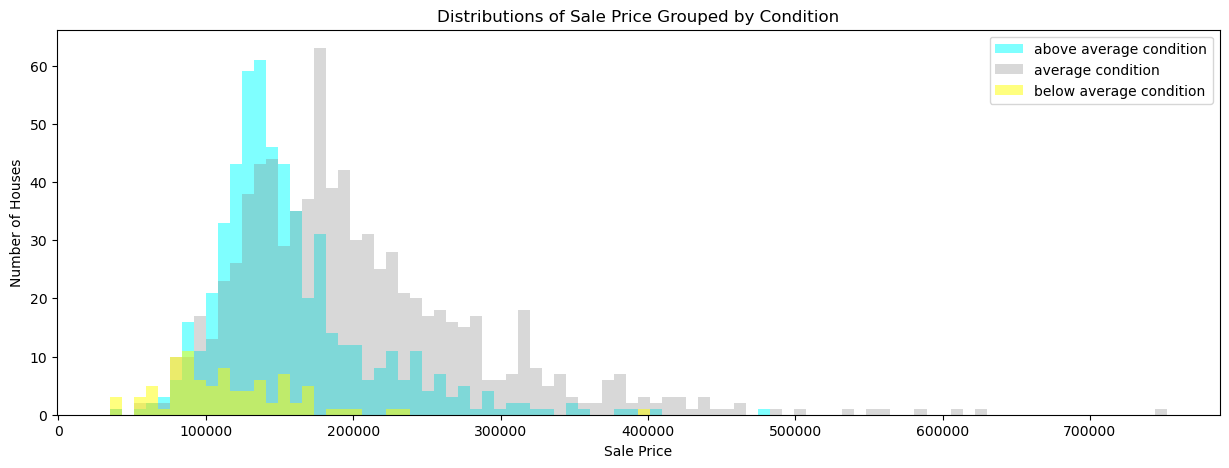

In [17]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend()
plt.show();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [18]:
# Replace None with appropriate text
"""
Below Average Condition (yellow):
Shows a concentration of lower-priced houses. The distribution suggests that these houses tend to be less expensive.

Average Condition (gray):
The largest group represents a broad range of prices, suggesting that the moderate spread of house prices reflects the typical market.

Above Average Condition (cyan):
Indicates higher-priced houses. The distribution skews towards the higher end, suggesting that houses in better condition are generally more expensive.
"""

'\nBelow Average Condition (yellow):\nShows a concentration of lower-priced houses. The distribution suggests that these houses tend to be less expensive.\n\nAverage Condition (gray):\nThe largest group represents a broad range of prices, suggesting that the moderate spread of house prices reflects the typical market.\n\nAbove Average Condition (cyan):\nIndicates higher-priced houses. The distribution skews towards the higher end, suggesting that houses in better condition are generally more expensive.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [19]:
# Your code here
# Filter numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Calculate the correlation of each numeric column with SalePrice
correlations = {}
for column in numeric_columns:
    if column != 'SalePrice':
        correlation = df['SalePrice'].corr(df[column])
        if correlation > 0:  # Only consider positive correlations
            correlations[column] = correlation
        
# Each column with its positive correlation
print("Columns with positive correlations with SalePrice:")
for column, correlation in correlations.items():
    print(f"{column}: {correlation:.2f}")
    
# Highest positive correlation
most_positive_corr_column = max(correlations, key=correlations.get)# use max
most_positive_corr_value = correlations[most_positive_corr_column]

print(f"The column most positively correlated with SalePrice is '{most_positive_corr_column}' with a correlation of {most_positive_corr_value:.2f}.")


Columns with positive correlations with SalePrice:
LotFrontage: 0.35
LotArea: 0.26
OverallQual: 0.79
YearBuilt: 0.52
YearRemodAdd: 0.51
MasVnrArea: 0.48
BsmtFinSF1: 0.39
BsmtUnfSF: 0.21
TotalBsmtSF: 0.61
1stFlrSF: 0.61
2ndFlrSF: 0.32
GrLivArea: 0.71
BsmtFullBath: 0.23
FullBath: 0.56
HalfBath: 0.28
BedroomAbvGr: 0.17
TotRmsAbvGrd: 0.53
Fireplaces: 0.47
GarageYrBlt: 0.49
GarageCars: 0.64
GarageArea: 0.62
WoodDeckSF: 0.32
OpenPorchSF: 0.32
3SsnPorch: 0.04
ScreenPorch: 0.11
PoolArea: 0.09
MoSold: 0.05
The column most positively correlated with SalePrice is 'OverallQual' with a correlation of 0.79.


Now, find the ***most negatively correlated*** column:

In [20]:
# Your code here
# Filter numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Calculate the correlation of each numeric column with SalePrice
correlations = {}
for column in numeric_columns:
    if column != 'SalePrice':
        correlation = df['SalePrice'].corr(df[column])
        correlations[column] = correlation

# Filter for negative correlations
negative_correlations = {column: corr for column, corr in correlations.items() if corr < 0}

# Print each column with its negative correlation
print("Columns with negative correlations with SalePrice:")
for column, correlation in negative_correlations.items():
    print(f"{column}: {correlation:.2f}")

# Find the column with the most negative correlation # use min 
most_negative_corr_column = min(negative_correlations, key=negative_correlations.get)
most_negative_corr_value = negative_correlations[most_negative_corr_column]
    
    
print(f"The column most negatively correlated with SalePrice is '{most_negative_corr_column}' with a correlation of {most_negative_corr_value:.2f}.")




Columns with negative correlations with SalePrice:
MSSubClass: -0.08
OverallCond: -0.08
BsmtFinSF2: -0.01
LowQualFinSF: -0.03
BsmtHalfBath: -0.02
KitchenAbvGr: -0.14
EnclosedPorch: -0.13
MiscVal: -0.02
YrSold: -0.03
The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation of -0.14.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

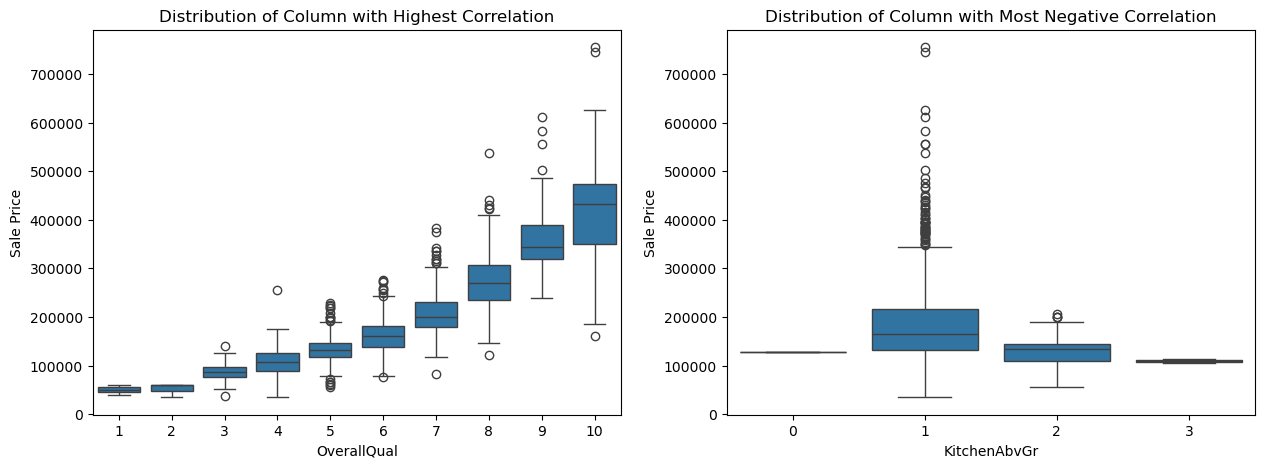

In [21]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Distribution of Column with Highest Correlation")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("Distribution of Column with Most Negative Correlation")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [22]:
# Replace None with appropriate text
"""
OverallQual is positively correlated with SalePrice as higher quality homes command higher prices, with greater variability and outliers at higher quality levels.
KitchenAbvGr is negatively correlated with SalePrice, meaning more than 1 kitchen in a house does not necessarily add value, and in some cases, might be associated with a decrease in sale price.
"""

'\nOverallQual is positively correlated with SalePrice as higher quality homes command higher prices, with greater variability and outliers at higher quality levels.\nKitchenAbvGr is negatively correlated with SalePrice, meaning more than 1 kitchen in a house does not necessarily add value, and in some cases, might be associated with a decrease in sale price.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [23]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

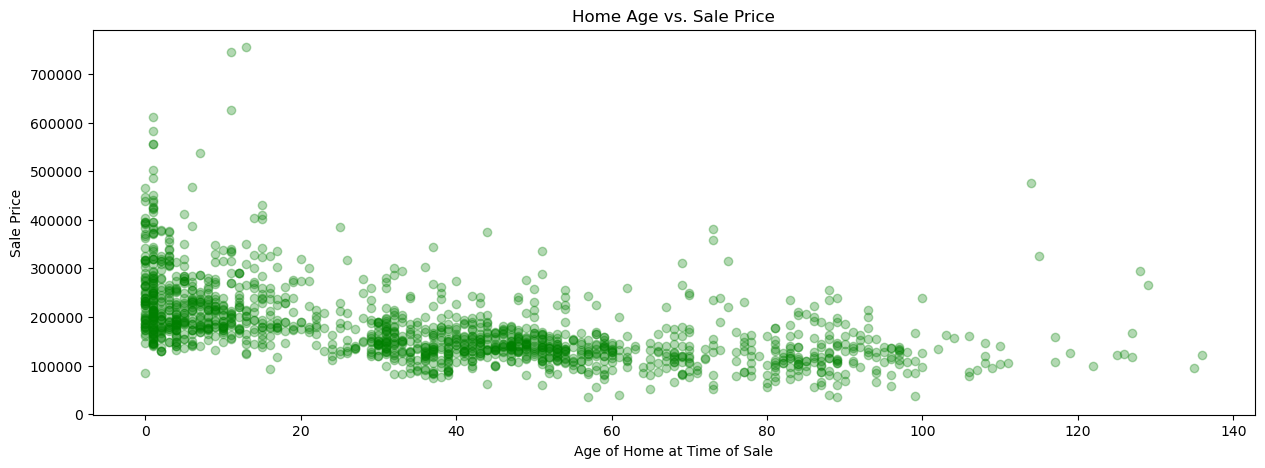

In [24]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price")
plt.show()

Interpret this plot below:

In [25]:
# Replace None with appropriate text
"""
Generally, newer homes seem more valuable than older ones. This could be because newer homes tend to be in better condition overall.
There are also notable clusters of points where homes of similar age were sold at varying prices, indicating that factors other than age probably also influence the sale price.
"""

'\nGenerally, newer homes seem more valuable than older ones. This could be because newer homes tend to be in better condition overall.\nThere are also notable clusters of points where homes of similar age were sold at varying prices, indicating that factors other than age probably also influence the sale price.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.